## ISM機能階層分析

#### ライブラリのインポート

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

#### 機能項目相互間の関係のマトリックス宣言

In [2]:
start_column = 7    # マトリックスの開始列（G列）
start_row = 5       # マトリックスの開始行（5行）
num = 22            # 読み取るセルの範囲（num 行の正方形を読み取る）

In [3]:
# 階層構造を定義した2次元マトリックスを取得する関数
def read_data(start_row, start_column, num):
    df = pd.read_excel("機能項目相互間の関係ver.2.xlsx", header=None, sheet_name="性能・性質", 
                       skiprows=start_row - 1, nrows=num, usecols=range(start_column - 1, start_column - 1 + num))
    
    data = np.where(df.values == "○", 1, 0)

    return data

# # データを読み取る
# matrix = read_data(start_row, start_column, num)
# matrix

matrix = np.array([[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ],
                    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, ],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ],
                    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ],
                    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ],
                    [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ],
                    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ],
                    [1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ],
                    [0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ],
                    [1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, ],
                    [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ],
                    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ],
                    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ],
                    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ],
                    [1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
matrix

array([[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#### 各種関数の定義

In [4]:
# ISM機能階層分析を行う関数
def ism_FHA(matrix):

    ###----------可達行列作成処理----------###
    # 行列のサイズを取得
    n = len(matrix)

    print('\n----------隣接行列----------')
    matrix = matrix.astype(bool)
    I = np.eye(n).astype(bool)
    adj_matrix = np.logical_or(matrix, I)
    print(adj_matrix.astype(int))

    print('\n----------可達行列----------')
    reachability_matrix = adj_matrix.copy()
    while not np.array_equal(reachability_matrix, reachability_matrix @ adj_matrix):
        reachability_matrix = reachability_matrix @ adj_matrix  #@演算子を利用することで行列積を求める（bool演算）
    print(reachability_matrix.astype(int))

    return reachability_matrix

# 指定した行と列を削除する関数
def remove_rows_and_columns(matrix, rows_to_remove):
    matrix = np.delete(matrix, rows_to_remove, axis=0)
    matrix = np.delete(matrix, rows_to_remove, axis=1)
    return matrix

# Trueが1つだけ含まれている行を探す関数
def find_single_true_row(matrix):
    single_true_rows = []
    for i in range(len(matrix)):
        if np.sum(matrix[i]) == 1:
            single_true_rows.append(i)
    return single_true_rows

# Trueが2つ含まれている場合

In [5]:
# ノードの配置を取得する関数
def get_layer_positions(removed_rows_dict, custom_pos={}):
    positions = {}
    current_x = 0
    for layer, nodes in removed_rows_dict.items():
        for node in nodes:
            positions[node] = (current_x, -layer)
            current_x += 1
        current_x = 0

    # custom_posで指定したノード番号のx座標を辞書リストに追加する
    for node, x_coord in custom_pos.items():
        positions[node] = (x_coord, positions[node][1])

    return positions

# グラフオブジェクトを作成する関数
def create_graph(removed_rows_dict):
    G = nx.DiGraph()

    # ノードをグラフに追加
    for i in range(matrix.shape[0]):
        G.add_node(i)

    # matrixを参照しエッジを追加する関数
    def add_edges(source_node, target_nodes, target_layer_dict):
        sorted_target_nodes = sorted(target_nodes, key=lambda node: target_layer_dict[node], reverse=True)
        for target_node in sorted_target_nodes:
            if source_node != target_node and not nx.has_path(G, source_node, target_node) and not nx.has_path(G, target_node, source_node):
                G.add_edge(source_node, target_node)
                print('Edge added:', source_node, '->' , target_node)

    sorted_removed_rows_dict = dict(sorted(removed_rows_dict.items()))  # 階層を昇順にソート

    # target_nodeが属する階層の情報を辞書リストとして取得
    target_layer_dict = {}
    for layer, nodes in removed_rows_dict.items():
        for node in nodes:
            target_layer_dict[node] = layer
    
    print('\n--------エッジ追加処理--------')
    for layer, nodes in sorted_removed_rows_dict.items():
        target_nodes = []
        for node in nodes:
            target_nodes = matrix[node].nonzero()[0]
            add_edges(node, target_nodes, target_layer_dict)
    
    return G

#### ISM機能階層分析 と 階層グラフの作成

In [6]:
from scipy.cluster.hierarchy import linkage, dendrogram
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# 可達行列導出
reachability_matrix = ism_FHA(matrix)

linked = linkage(reachability_matrix, 'ward')


----------隣接行列----------
[[1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0]
 [1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0]
 [0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0]
 [1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1]]

----------可達行列----------
[[1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0]
 [1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0]
 [1 0 1 0 1

# ここからいろいろお試し
# ダンドログラム

C:\Users\human\AppData\Local\Temp\ipykernel_23272\1414607438.py:20: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distances, method='ward')
c:\WorkSpace\ISM_Analysis\ISM_Analysis\env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12480 (\N{KATAKANA LETTER DA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\WorkSpace\ISM_Analysis\ISM_Analysis\env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\WorkSpace\ISM_Analysis\ISM_Analysis\env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12489 (\N{KATAKANA LETTER DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\WorkSpace\ISM_Analysis\ISM_Analysis\env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

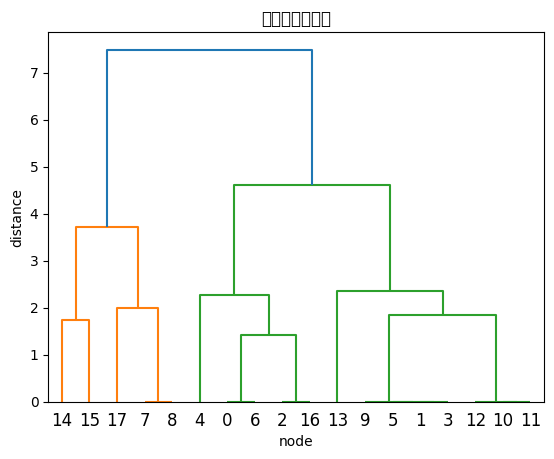

In [8]:
# 行列をグラフに変換
G = nx.DiGraph()
G.add_nodes_from(range(len(reachability_matrix)))
for i in range(len(reachability_matrix)):
    for j in range(len(reachability_matrix[i])):
        if reachability_matrix[i][j] == 1:
            G.add_edge(i, j)

# 隣接行列を対称化する
reachability_matrix = np.array(reachability_matrix)
symmetric_adjacency_matrix = np.maximum(reachability_matrix, reachability_matrix.T)

# 階層クラスタリングを実行
from scipy.cluster.hierarchy import dendrogram, linkage

# 対称な隣接行列を距離行列として使用
distances = 1 - symmetric_adjacency_matrix  # エッジの存在/非存在を距離に変換

# 階層クラスタリングを実行
linkage_matrix = linkage(distances, method='ward')

# ダンドログラムのプロット
dendrogram(linkage_matrix, labels=list(range(len(reachability_matrix))))
plt.xlabel("node")
plt.ylabel("distance")
plt.title("ダンドログラム")
plt.show()

In [9]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

c:\WorkSpace\ISM_Analysis\ISM_Analysis\env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12494 (\N{KATAKANA LETTER NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


c:\WorkSpace\ISM_Analysis\ISM_Analysis\env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\WorkSpace\ISM_Analysis\ISM_Analysis\env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12489 (\N{KATAKANA LETTER DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\WorkSpace\ISM_Analysis\ISM_Analysis\env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36317 (\N{CJK UNIFIED IDEOGRAPH-8DDD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\WorkSpace\ISM_Analysis\ISM_Analysis\env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38626 (\N{CJK UNIFIED IDEOGRAPH-96E2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\WorkSpace\ISM_Analysis\ISM_Analysis\env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 1248

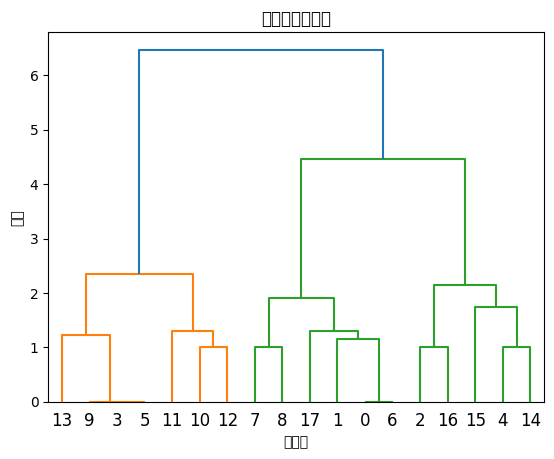

In [10]:
# 有向グラフを生成
G = nx.DiGraph()
G.add_nodes_from(range(len(reachability_matrix)))
for i in range(len(reachability_matrix)):
    for j in range(len(reachability_matrix[i])):
        if reachability_matrix[i][j] == 1:
            G.add_edge(i, j)

# 到達可能性行列を生成
reachable_matrix = np.zeros_like(reachability_matrix)
for i in range(len(reachability_matrix)):
    for j in range(len(reachability_matrix)):
        reachable_matrix[i][j] = int(nx.has_path(G, i, j))

# 階層クラスタリングを実行
linkage_matrix = linkage(reachable_matrix, method='ward')

# ダンドログラムのプロット
dendrogram(linkage_matrix, labels=list(range(len(reachability_matrix))))
plt.xlabel("ノード")
plt.ylabel("距離")
plt.title("ダンドログラム")
plt.show()

G

# 矢印の向き

In [11]:
# ISMマトリックスの生成（単純な例として、可到達行列を使って）
ism_matrix = reachability_matrix


# ISMモデルを作成（具体的なモデリングステップはドメインに依存）
print("ISMモデル:")
for i in range(len(ism_matrix)):
    for j in range(len(ism_matrix[i])):
        if ism_matrix[i][j] == 1:
            print(f"ノード {i} はノード {j} を影響します。")

ISMモデル:
ノード 0 はノード 0 を影響します。
ノード 0 はノード 2 を影響します。
ノード 0 はノード 4 を影響します。
ノード 0 はノード 6 を影響します。
ノード 0 はノード 16 を影響します。
ノード 1 はノード 0 を影響します。
ノード 1 はノード 1 を影響します。
ノード 1 はノード 2 を影響します。
ノード 1 はノード 4 を影響します。
ノード 1 はノード 6 を影響します。
ノード 1 はノード 16 を影響します。
ノード 2 はノード 2 を影響します。
ノード 3 はノード 0 を影響します。
ノード 3 はノード 1 を影響します。
ノード 3 はノード 2 を影響します。
ノード 3 はノード 3 を影響します。
ノード 3 はノード 4 を影響します。
ノード 3 はノード 5 を影響します。
ノード 3 はノード 6 を影響します。
ノード 3 はノード 9 を影響します。
ノード 3 はノード 16 を影響します。
ノード 4 はノード 4 を影響します。
ノード 5 はノード 0 を影響します。
ノード 5 はノード 1 を影響します。
ノード 5 はノード 2 を影響します。
ノード 5 はノード 3 を影響します。
ノード 5 はノード 4 を影響します。
ノード 5 はノード 5 を影響します。
ノード 5 はノード 6 を影響します。
ノード 5 はノード 9 を影響します。
ノード 5 はノード 16 を影響します。
ノード 6 はノード 0 を影響します。
ノード 6 はノード 2 を影響します。
ノード 6 はノード 4 を影響します。
ノード 6 はノード 6 を影響します。
ノード 6 はノード 16 を影響します。
ノード 7 はノード 0 を影響します。
ノード 7 はノード 2 を影響します。
ノード 7 はノード 4 を影響します。
ノード 7 はノード 6 を影響します。
ノード 7 はノード 7 を影響します。
ノード 7 はノード 16 を影響します。
ノード 8 はノード 0 を影響します。
ノード 8 はノード 2 を影響します。
ノード 8 はノード 4 を影響します。
ノード 8 はノード 6 を影響します。
ノード 8 はノード 7 を影響します。

# 影響度と関連度を考慮した場合

In [12]:
reachability_matrix.astype(int)
row = len(reachability_matrix)
print(row)

18


In [86]:
# row_sums = np.sum(reachability_matrix, axis=1)    # ISM
row_sums = np.sum(matrix, axis=1)   # dematel
# 各行の和を表示
for i, row_sum in enumerate(row_sums):
    print(f"行 {i + 1} の和: {row_sum}")

row_sums

行 1 の和: 5
行 2 の和: 6
行 3 の和: 1
行 4 の和: 9
行 5 の和: 1
行 6 の和: 9
行 7 の和: 5
行 8 の和: 6
行 9 の和: 7
行 10 の和: 9
行 11 の和: 11
行 12 の和: 12
行 13 の和: 10
行 14 の和: 10
行 15 の和: 2
行 16 の和: 1
行 17 の和: 2
行 18 の和: 6


array([ 5,  6,  1,  9,  1,  9,  5,  6,  7,  9, 11, 12, 10, 10,  2,  1,  2,
        6])

In [87]:
# 各列の和を計算
# column_sums = np.sum(reachability_matrix, axis=0) # ISM
column_sums = np.sum(matrix, axis=0)    # dematel

# 各列の和を表示
for j, column_sum in enumerate(column_sums):
    print(f"列 {j + 1} の和: {column_sum}")

列 1 の和: 13
列 2 の和: 8
列 3 の和: 15
列 4 の和: 7
列 5 の和: 15
列 6 の和: 7
列 7 の和: 13
列 8 の和: 2
列 9 の和: 1
列 10 の和: 7
列 11 の和: 2
列 12 の和: 1
列 13 の和: 3
列 14 の和: 1
列 15 の和: 1
列 16 の和: 1
列 17 の和: 14
列 18 の和: 1


In [88]:
# 関連度
d_add_r = row_sums + column_sums
d_add_r

array([18, 14, 16, 16, 16, 16, 18,  8,  8, 16, 13, 13, 13, 11,  3,  2, 16,
        7])

In [89]:
d_subtract_r = row_sums - column_sums
d_subtract_r

array([ -8,  -2, -14,   2, -14,   2,  -8,   4,   6,   2,   9,  11,   7,
         9,   1,   0, -12,   5])

In [90]:
len(d_add_r)

18

In [91]:
numbers = list(range(1, len(d_add_r)+1))

In [92]:
import japanize_matplotlib

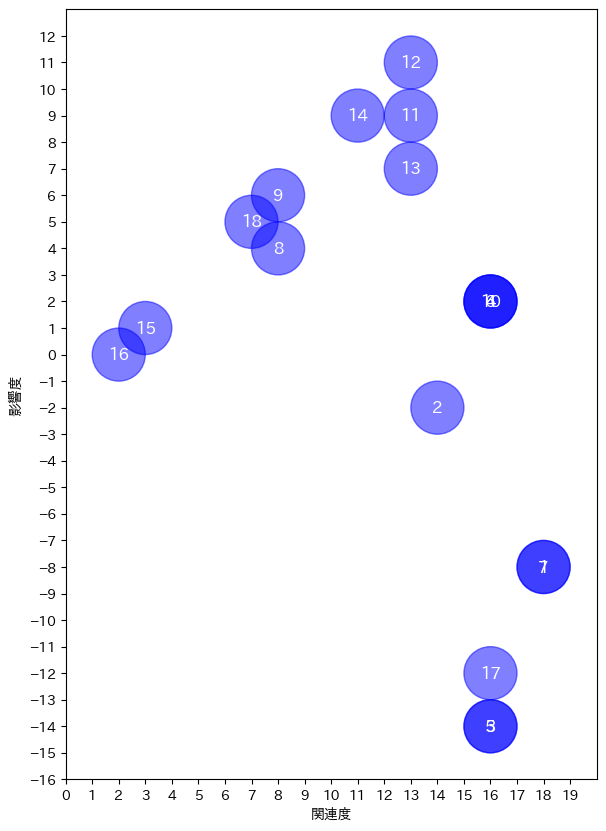

In [93]:

# 描画領域を作成する
fig, ax = plt.subplots(figsize=(10, 10))
# fig, ax = plt.subplots()

# 円を描画する
for i, (x, y, num) in enumerate(zip(d_add_r, d_subtract_r, numbers)):
    circle = plt.Circle((x, y), 1, color='blue', alpha=0.5)  # 中心座標 (x, y)、半径 0.3 の円を作成
    ax.add_patch(circle)
    ax.text(x, y, str(num), ha='center', va='center', color='white', fontsize=12)  # 中央に数字を記載

# グラフの設定
ax.set_aspect('equal')  # アスペクト比を等しくする
ax.set_xlim(min(d_add_r)-2, max(d_add_r)+2)  # x 軸の範囲を設定
ax.set_ylim(min(d_subtract_r)-2, max(d_subtract_r)+2)  # y 軸の範囲を設定
ax.set_xticks(np.arange(min(d_add_r)-2, max(d_add_r)+2))  # x 軸の目盛りを非表示にする
ax.set_yticks(np.arange(min(d_subtract_r)-2, max(d_subtract_r)+2))  # y 軸の目盛りを非表示にする
ax.set_xlabel("関連度")
ax.set_ylabel("影響度")
plt.savefig("fig/dematel_test2.png")

# グラフを表示する
plt.show()

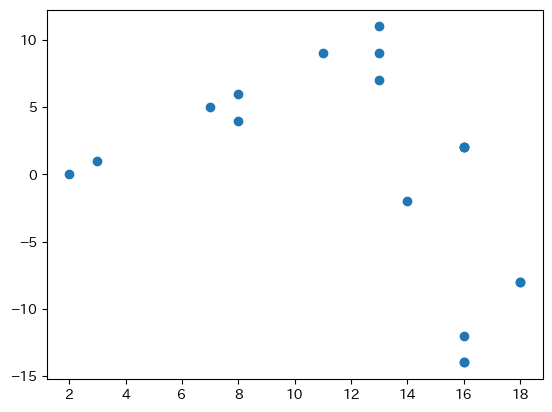

In [94]:
plt.scatter(d_add_r, d_subtract_r)

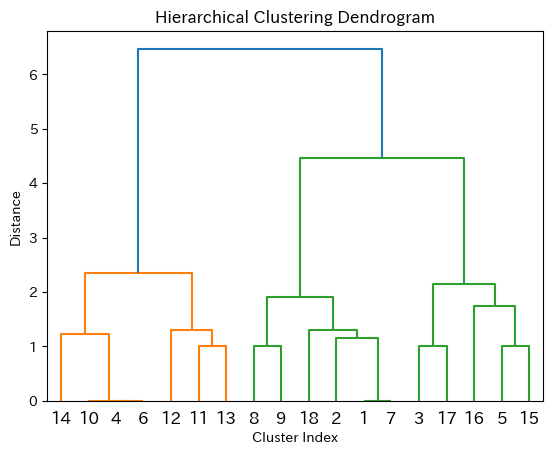

In [95]:
# 可達行列から樹形図
dendrogram(linked, orientation='top', labels=range(1, len(reachability_matrix) + 1))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Index')
plt.ylabel('Distance')
plt.show()

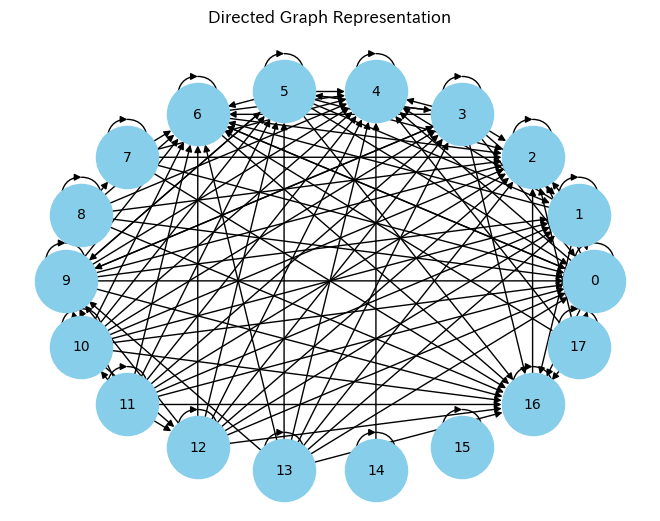

In [96]:
# 可達行列から有向グラフ
G = nx.DiGraph(reachability_matrix)

pos = nx.circular_layout(G)  # ノードの配置方法を設定
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=10, font_color='black')
plt.title('Directed Graph Representation')
plt.show()

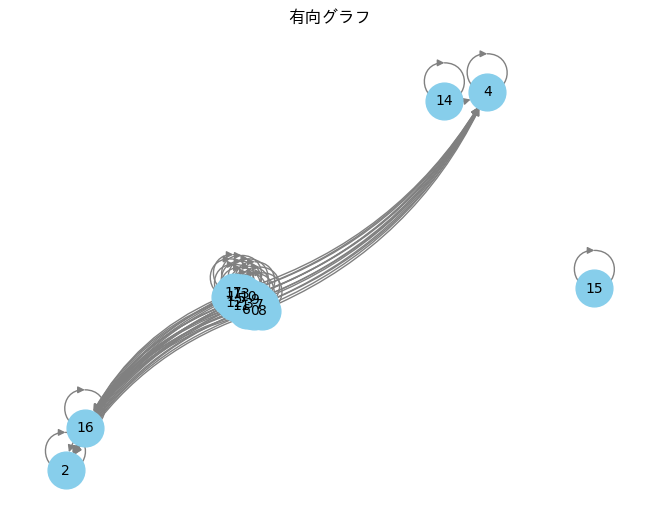

In [97]:


# グラフオブジェクトを作成
G = nx.DiGraph()

# 可達行列の行数（および列数）を取得
num_nodes = len(reachability_matrix)

# ノードをグラフに追加
for node_id in range(num_nodes):
    G.add_node(node_id)

# エッジをグラフに追加
for i in range(num_nodes):
    for j in range(num_nodes):
        if reachability_matrix[i][j] == 1:
            G.add_edge(i, j)

# グラフを描画
pos = nx.spring_layout(G)  # グラフを描画するためのレイアウトを計算
# nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_color='black')
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_color='black', edge_color='gray', connectionstyle="arc3,rad=0.2")
plt.title("有向グラフ")
plt.show()

In [98]:
# ISM機能階層分析を実行
removed_rows_dict = ism_FHA(matrix) # 肩つ行列までは求まるがエッジ作成ができない


----------隣接行列----------
[[1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0]
 [1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0]
 [0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0]
 [1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1]]

----------可達行列----------
[[1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0]
 [1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0]
 [1 0 1 0 1

In [99]:
# グラフを作成
G = create_graph(removed_rows_dict)

# ノードの配置を取得
pos = get_layer_positions(removed_rows_dict)

# グラフを描画して表示
plt.figure(figsize=(8, 8), dpi=600)
nx.draw(G, pos, with_labels=True, node_size=1500, node_color="skyblue", font_size=10, font_weight="bold", arrowsize=15)
plt.savefig('fig\ISM-FHA_exercise.png', format='png')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'items'

ノードの位置を調節  
- エッジが重なって表示されているところがあるため  
- 見やすくなるようにするため  

In [ ]:
# custom_posでノード番号に対応するx座標を指定する
custom_pos = {3 : 1, 
              4 : 2,
              11: -1,
              16: 0}

# ノードの配置を取得
pos_fix = get_layer_positions(removed_rows_dict, custom_pos)

# グラフを描画して表示
plt.figure(figsize=(12, 10), dpi=600)
nx.draw(G, pos_fix, with_labels=True, node_size=1500, node_color="skyblue", font_size=10, font_weight="bold", arrowsize=15)
plt.savefig('fig\ISM-FHA_exercise_fix.png', format='png')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'items'